## Customer Segmentation Custering Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel(r"D:\Data\Machine_Learning\Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleaning

In [6]:
# Checking the percentage null values in the dataset.
np.round((data.isna().sum()/len(data))*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# dropping the null values
data.dropna(inplace=True)

In [8]:
data.shape

(406829, 8)

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# Performing Feature Engineering
# Adding the new column Amount using the existing columns Quantity and UnitPrice
# these is the Monetary total revenue contributed.

data['Amount'] = data.Quantity*data.UnitPrice
data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
retail = data.groupby('CustomerID')['Amount'].sum()
retail = retail.reset_index()
retail.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
# frequency
# count function gets the count of each item
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [13]:
# merge the two dataframes using the inner join.
data1 = pd.merge(retail, frequency, on='CustomerID', how='inner')
data1.head()

,CustomerID,Amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [14]:
# compute the max date
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
# compute the difference
data['difference'] = max_date - data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [16]:
# Calculating the Recency of the Customers
recency = data.groupby('CustomerID')['difference'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [17]:
# Extracting only the days from the difference column
recency.difference = recency.difference.dt.days 

In [18]:
# merge
newdata = pd.merge(data1, recency, on='CustomerID', how='inner')
newdata.columns = ['CustomerID', 'amount', 'frequency', 'recency']
newdata.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


## Dectecting the outliers

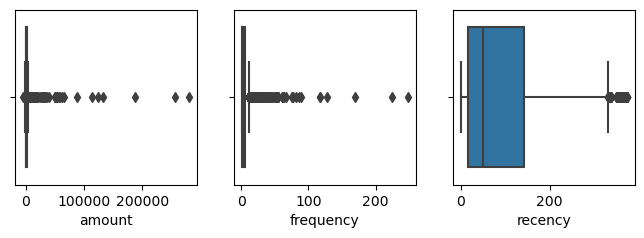

In [19]:
plt.figure(figsize=(8,5))
plt.subplot(231)
sns.boxplot(x=newdata.amount)
plt.subplot(232)
sns.boxplot(x=newdata.frequency)
plt.subplot(233)
sns.boxplot(x=newdata.recency);

## 🌟Observations:
1. Detecting the Outliers using boxplot in amount, frequency and recency columns.
2. In the Amount and Frequency column has the more outliers so, treatmnet is needed for this.

## Treating the Outliers

In [20]:
# Using Quantiles in Statistical way

# outlier treatment for amount
Q1 = newdata.amount.quantile(0.10)
Q3 = newdata.amount.quantile(0.90)
IQR = Q3 - Q1
newdata = newdata[(newdata.amount >= Q1 - 1.5*IQR) & (newdata.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = newdata.recency.quantile(0.10)
Q3 = newdata.recency.quantile(0.90)
IQR = Q3 - Q1
newdata = newdata[(newdata.recency >= Q1 - 1.5*IQR) & (newdata.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = newdata.frequency.quantile(0.10)
Q3 = newdata.frequency.quantile(0.90)
IQR = Q3 - Q1
newdata = newdata[(newdata.frequency >= Q1 - 1.5*IQR) & (newdata.frequency <= Q3 + 1.5*IQR)]

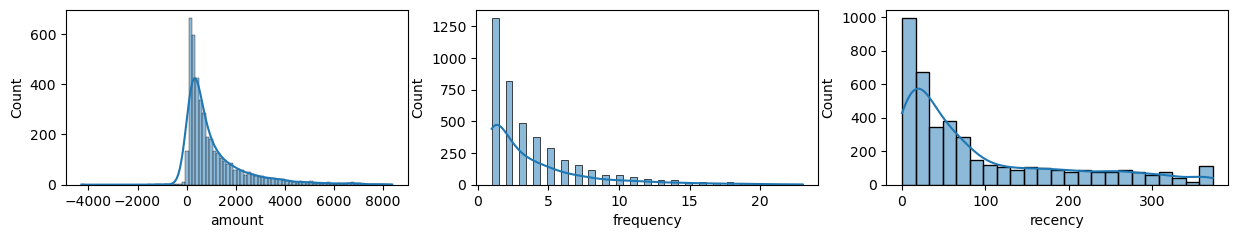

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(231)
sns.histplot(x=newdata.amount, kde=True)
plt.subplot(232)
sns.histplot(x=newdata.frequency, kde=True)
plt.subplot(233)
sns.histplot(x=newdata.recency, kde=True);

In [33]:
newdata.skew()

CustomerID   -0.008146
amount        2.208336
frequency     2.032551
recency       1.208112
dtype: float64

## 🌟Observations:
1. In all three columns the skewness is greater than 1, the data is highly skewed.

## Preparing for the model

In [35]:
newdata = newdata[['amount', 'frequency', 'recency']]
newdata.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,7,1
2,1797.24,4,74
3,1757.55,1,18
4,334.40,1,309


## Rescaling the data

In [36]:
scaler = StandardScaler()

# fit_transform
newdata_rescaled = scaler.fit_transform(newdata)
newdata_rescaled.shape

newdata_rescaled = pd.DataFrame(newdata_rescaled)
newdata_rescaled.columns = ['amount', 'frequency', 'recency']
newdata_rescaled.head()

(4209, 3)

,amount,frequency,recency
0,-0.844245,-0.498797,2.280654
1,2.423353,0.801164,-0.919107
2,0.518321,0.021187,-0.198173
3,0.488230,-0.758789,-0.751218
4,-0.590722,-0.758789,2.122641


### Finding the Optimal Number of Clusters(n_clusters) using the elbow- method

In [38]:
# this is used to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

KMeans(max_iter=50, n_clusters=2)

KMeans(max_iter=50, n_clusters=3)

KMeans(max_iter=50, n_clusters=4)

KMeans(max_iter=50, n_clusters=5)

KMeans(max_iter=50, n_clusters=6)

KMeans(max_iter=50, n_clusters=7)

KMeans(max_iter=50)

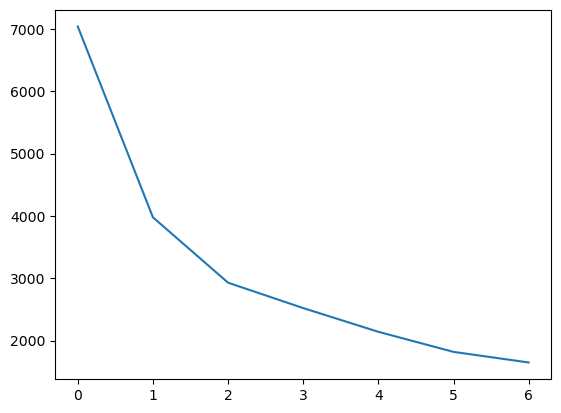

In [39]:
lst = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(newdata_rescaled)
    lst.append(kmeans.inertia_)
    
# Plotting
plt.plot(lst)

##### By using Elbow method we identified the best n_clusters is 3

In [45]:
model = KMeans(n_clusters=3, max_iter=50)
model.fit(newdata_rescaled)

KMeans(max_iter=50, n_clusters=3)

In [46]:
model.labels_ # Display the labels each of the clusters

array([1, 2, 0, ..., 0, 2, 0])

In [47]:
# assign the label
newdata['cluster_id'] = model.labels_
newdata.head()

,amount,frequency,recency,cluster_id
0,0.00,2,325,1
1,4310.00,7,1,2
2,1797.24,4,74,0
3,1757.55,1,18,0
4,334.40,1,309,1


In [44]:
newdata.cluster_id.value_counts(normalize=True)

1    0.593728
0    0.251366
2    0.154906
Name: cluster_id, dtype: float64

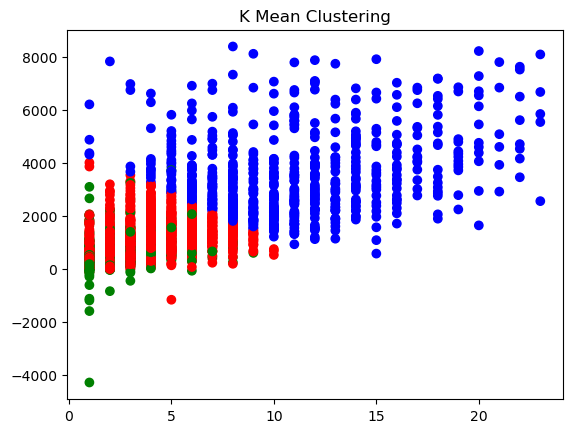

In [51]:
# Create a colormap
colormap = np.array(['red', 'green', 'blue'])
 
# Plot the Original Classifications
plt.scatter(newdata.frequency, newdata.amount, c=colormap[model.labels_])
plt.title('K Mean Clustering');

##### These are the clusters formed using the kmeans algorithm

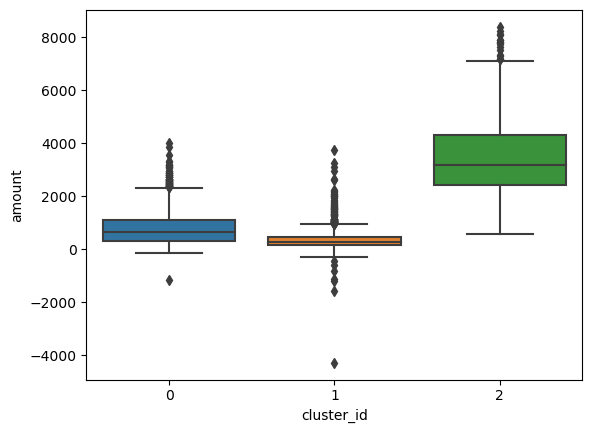

In [52]:
sns.boxplot(x=newdata.cluster_id, y=newdata.amount);

### 🌟Important Observations :
* Cluster_id 2 represents high monetary customers.
* Cluster_id 1 represents least monetary customers.

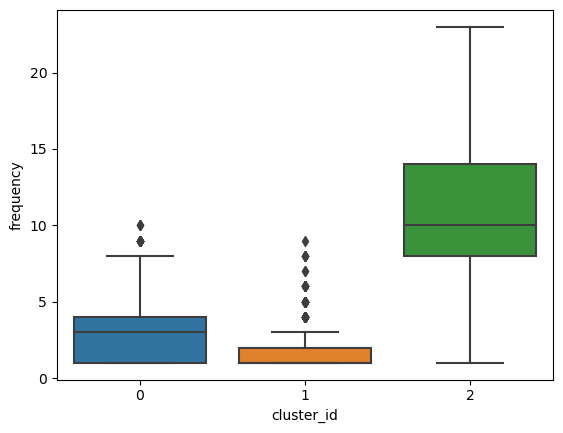

In [53]:
sns.boxplot(x=newdata.cluster_id, y=newdata.frequency);

### 🌟Important Observations :
* Cluster_id 2 represents high frequency customers.
* Cluster_id 1 represents least frequency customers.

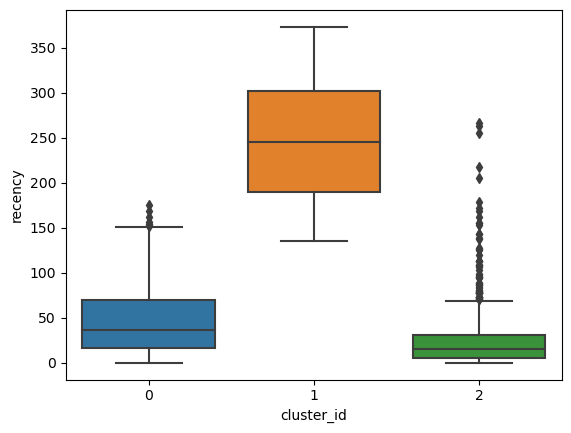

In [54]:
sns.boxplot(x=newdata.cluster_id, y=newdata.recency);

## 🌟Important Observations :
* Cluster_id 2 represents high recency customers.
* Cluster_id 1 represents least recency customers.